In [5]:
%matplotlib inline 
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.framework import graph_util
from tensorflow.python.platform import gfile
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import numpy as np

pb_file_path = os.getcwd() + '/'

mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

# 输入想预测的data index
idx = 123

xx = mnist.test.images[idx:(idx+1)]
yy = np.float32(mnist.test.labels[idx:(idx+1)])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
with tf.Session() as sess:
    with gfile.FastGFile(pb_file_path+'simple_cnn_mnist_model.pb', 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        sess.graph.as_default()
        tf.import_graph_def(graph_def, name='') # 导入计算图

    # 需要有一个初始化的过程    
    sess.run(tf.global_variables_initializer())

    sess.run('weight_conv1:0')
    sess.run('bias_conv1:0')
    sess.run('weight_conv2:0')
    sess.run('bias_conv1:0')
    sess.run('weight_fc1:0')
    sess.run('bias_fc1:0')
    sess.run('weight_out:0')
    sess.run('bias_out:0')
    
    input_x = sess.graph.get_tensor_by_name('x:0')
    input_y = sess.graph.get_tensor_by_name('y:0')
    kprob = sess.graph.get_tensor_by_name('keep_prob:0')
    
    output = sess.graph.get_tensor_by_name('out:0')

    y_out = output.eval( feed_dict={input_x: xx, input_y: yy, kprob: 1} )
    
    print("Result is:" + str(np.argmax(y_out)))

Result is:6


In [7]:
#placeholders = [ op for op in sess.graph.get_operations() if op.type == "Placeholder"]

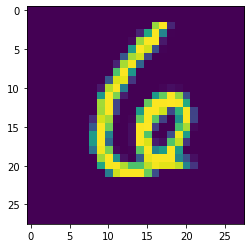

In [8]:
x_image=np.reshape(xx,[28,28])
plt.imshow(x_image, interpolation='nearest')
plt.show()